In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading Dataset
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Classification Models with Accuracy Table
classifiers = pd.DataFrame([['KNN',KNeighborsClassifier()],
                            ['SVM',SVC(kernel = 'rbf')],
                            ['Decision Tree',DecisionTreeClassifier()],
                            ['Random Forest',RandomForestClassifier()]],
                          columns = ['Model', 'Function'])
classifiers['Accuracy1'] = np.nan
classifiers['Accuracy2'] = np.nan
classifiers['Improvement'] = np.nan
classifiers

,Model,Function,Accuracy1,Accuracy2,Improvement
0,KNN,KNeighborsClassifier(),NaN,NaN,NaN
1,SVM,SVC(),NaN,NaN,NaN
2,Decision Tree,DecisionTreeClassifier(),NaN,NaN,NaN
3,Random Forest,RandomForestClassifier(),NaN,NaN,NaN


In [4]:
# Accuracy Calculator Function
def acc_calculator(accr):
  for i in classifiers.index:
    classifiers[accr][i] = np.mean(cross_val_score(classifiers['Function'][i], x, y, cv=5,scoring='accuracy'))*100

In [5]:
# Defining x, y in Dataset
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , 8].values

In [6]:
# Calculating Accuracies
acc_calculator('Accuracy1')

C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1968401990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classifiers[accr][i] = np.mean(cross_val_score(classifiers['Function'][i], x, y, cv=5,scoring='accuracy'))*100
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1968401990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classifiers[accr][i] = np.mean(cross_val_score(classifiers['Function'][i], x, y, cv=5,scoring='accuracy'))*100
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1968401990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [7]:
classifiers

,Model,Function,Accuracy1,Accuracy2,Improvement
0,KNN,KNeighborsClassifier(),72.397929,NaN,NaN
1,SVM,SVC(),75.914608,NaN,NaN
2,Decision Tree,DecisionTreeClassifier(),70.455819,NaN,NaN
3,Random Forest,RandomForestClassifier(),76.829641,NaN,NaN


In [8]:
# Dropping Pregnancy
dataset.drop('Pregnancies', axis=1,inplace=True)
dataset

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [9]:
# Counting Zeros in Columns
print('Count of Zeros:')
print((dataset == 0).sum())

Count of Zeros:
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [10]:
# Saving Indexes in ID column
dataset.reset_index(inplace=True)
dataset.rename(columns = {'index':'ID'}, inplace = True)
dataset

,ID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,2,183,64,0,0,23.3,0.672,32,1
3,3,89,66,23,94,28.1,0.167,21,0
4,4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,763,101,76,48,180,32.9,0.171,63,0
764,764,122,70,27,0,36.8,0.340,27,0
765,765,121,72,23,112,26.2,0.245,30,0
766,766,126,60,0,0,30.1,0.349,47,1


In [11]:
# Replacing Missing Values with Null
dataset.replace({'Glucose':0,'BloodPressure':0,'SkinThickness':0,'Insulin':0,'BMI':0,}, np.nan, inplace=True)
dataset

,ID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,2,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,3,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,763,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,764,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,765,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,766,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [12]:
# Counting Missing Values
dataset.isnull().sum()

ID                            0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Creating Strategy to Handle Missing Values

In [13]:
print((dataset['Glucose'].isnull() & dataset['BloodPressure'].isnull()).sum())
print((dataset['Glucose'].isnull() & dataset['SkinThickness'].isnull()).sum())
print((dataset['Glucose'].isnull() & dataset['Insulin'].isnull()).sum())
print((dataset['Glucose'].isnull() & dataset['BMI'].isnull()).sum())

0
0
4
0


In [14]:
print((dataset['BloodPressure'].isnull() & dataset['Glucose'].isnull()).sum())
print((dataset['BloodPressure'].isnull() & dataset['SkinThickness'].isnull()).sum())
print((dataset['BloodPressure'].isnull() & dataset['Insulin'].isnull()).sum())
print((dataset['BloodPressure'].isnull() & dataset['BMI'].isnull()).sum())

0
33
35
7


In [15]:
print((dataset['SkinThickness'].isnull() & dataset['Glucose'].isnull()).sum())
print((dataset['SkinThickness'].isnull() & dataset['BloodPressure'].isnull()).sum())
print((dataset['SkinThickness'].isnull() & dataset['Insulin'].isnull()).sum())
print((dataset['SkinThickness'].isnull() & dataset['BMI'].isnull()).sum())

0
33
227
9


In [16]:
print((dataset['Insulin'].isnull() & dataset['Glucose'].isnull()).sum())
print((dataset['Insulin'].isnull() & dataset['BloodPressure'].isnull()).sum())
print((dataset['Insulin'].isnull() & dataset['SkinThickness'].isnull()).sum())
print((dataset['Insulin'].isnull() & dataset['BMI'].isnull()).sum())

4
35
227
10


In [17]:
print((dataset['BMI'].isnull() & dataset['Glucose'].isnull()).sum())
print((dataset['BMI'].isnull() & dataset['BloodPressure'].isnull()).sum())
print((dataset['BMI'].isnull() & dataset['SkinThickness'].isnull()).sum())
print((dataset['BMI'].isnull() & dataset['Insulin'].isnull()).sum())

0
7
9
10


## Strategy to Handle Missing Values
1. Handle **Glucose** without Insulin
2. Handle **BMI** without BloodPressure, SkinThickness & Insulin
3. Handle **BloodPressure** without SkinThickness & Insulin
4. Handle **SkinThickness** without Insulin
5. Handle **Insulin**

# Regression Models & Error Calculator

In [18]:
# Regression Model with R2 Score Table
regressors = pd.DataFrame([['Linear Regression',LinearRegression()],
                           ['SVR',SVR(kernel = 'rbf')],
                           ['Decision Tree',DecisionTreeRegressor()],
                           ['Random Forest',RandomForestRegressor()]],
                          columns = ['Model', 'Function'])
regressors['R2 Score'] = np.nan
regressors

,Model,Function,R2 Score
0,Linear Regression,LinearRegression(),NaN
1,SVR,SVR(),NaN
2,Decision Tree,DecisionTreeRegressor(),NaN
3,Random Forest,RandomForestRegressor(),NaN


In [19]:
# R2 Score Calculator Function
def r2_calculator():
  for i in regressors.index:
    regressors['R2 Score'][i] = np.mean(cross_val_score(regressors['Function'][i], x, y, cv=5,scoring='r2'))

# Handling Missing Values of Glucose column

In [20]:
# Copying Dataset to "pred_data"
pred_data = dataset.copy()
pred_data

,ID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,2,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,3,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,763,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,764,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,765,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,766,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [21]:
# Dropping Insulin & Outcome
pred_data.drop(['Insulin', 'Outcome'], axis=1,inplace=True)
pred_data

,ID,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,0,148.0,72.0,35.0,33.6,0.627,50
1,1,85.0,66.0,29.0,26.6,0.351,31
2,2,183.0,64.0,NaN,23.3,0.672,32
3,3,89.0,66.0,23.0,28.1,0.167,21
4,4,137.0,40.0,35.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,763,101.0,76.0,48.0,32.9,0.171,63
764,764,122.0,70.0,27.0,36.8,0.340,27
765,765,121.0,72.0,23.0,26.2,0.245,30
766,766,126.0,60.0,NaN,30.1,0.349,47


In [22]:
# Creating Glucose Training Data
train_data = pred_data.copy()
train_data.drop('ID', axis=1, inplace=True)
train_data.dropna(axis=0,inplace=True)
train_data

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,33.6,0.627,50
1,85.0,66.0,29.0,26.6,0.351,31
3,89.0,66.0,23.0,28.1,0.167,21
4,137.0,40.0,35.0,43.1,2.288,33
6,78.0,50.0,32.0,31.0,0.248,26
...,...,...,...,...,...,...
761,170.0,74.0,31.0,44.0,0.403,43
763,101.0,76.0,48.0,32.9,0.171,63
764,122.0,70.0,27.0,36.8,0.340,27
765,121.0,72.0,23.0,26.2,0.245,30


In [23]:
# Verifying Null Counts in Glucose Training Data
train_data.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [24]:
# Creating Glucose Prediction Data
pred_data = pred_data[pred_data['Glucose'].isnull()]
pred_data.reset_index(inplace=True)
pred_data.drop('index', axis=1,inplace=True)
pred_data

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ID,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,75,NaN,48.0,20.0,24.7,0.140,22
1,182,NaN,74.0,20.0,27.7,0.299,21
2,342,NaN,68.0,35.0,32.0,0.389,22
3,349,NaN,80.0,32.0,41.0,0.346,37
4,502,NaN,68.0,41.0,39.0,0.727,41


## Finding Best Glucose Prediction Model

In [25]:
# Creating x,y for Glucose
x = train_data.loc[:, ['BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']].values
y = train_data.loc[:, 'Glucose'].values

In [26]:
# Calculating R2 Scores for Glucose
r2_calculator()

C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regressors['R2 Score'][i] = np.mean(cross_val_score(regressors['Function'][i], x, y, cv=5,scoring='r2'))
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regressors['R2 Score'][i] = np.mean(cross_val_score(regressors['Function'][i], x, y, cv=5,scoring='r2'))
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [27]:
# R2 Scores for Glucose
regressors

,Model,Function,R2 Score
0,Linear Regression,LinearRegression(),0.119354
1,SVR,SVR(),0.071143
2,Decision Tree,DecisionTreeRegressor(),-0.689272
3,Random Forest,RandomForestRegressor(),0.105081


In [28]:
# Best Model for Glucose
idx = regressors['R2 Score'].idxmax()
print('Best model for Glucose is: {} with R2 Score: {} at index: {}'.format(regressors['Model'][idx],regressors['R2 Score'][idx],idx))

Best model for Glucose is: Linear Regression with R2 Score: 0.11935413765869585 at index: 0


In [29]:
# Predicting Missing Glucose Data
x_train = train_data.loc[:, ['BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']].values
y_train = train_data.loc[:,'Glucose'].values
x_pred = pred_data.loc[:, ['BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']].values

reg_mod = regressors['Function'][idx]
reg_mod.fit(x_train, y_train)

y_pred = reg_mod.predict(x_pred)
y_pred

array([ 99.01879746, 107.4606641 , 113.45869525, 130.40265626,
       134.92258083])

In [30]:
# Updating Predicted Glucose Data in pred_data
for i in pred_data.index:
    pred_data.at[i, 'Glucose'] = y_pred[i]

pred_data

,ID,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,75,99.018797,48.0,20.0,24.7,0.140,22
1,182,107.460664,74.0,20.0,27.7,0.299,21
2,342,113.458695,68.0,35.0,32.0,0.389,22
3,349,130.402656,80.0,32.0,41.0,0.346,37
4,502,134.922581,68.0,41.0,39.0,0.727,41


In [31]:
# Updating Predicted Glucose Data in Dataset
j=0
for i in pred_data['ID']:
    dataset.at[i, 'Glucose'] = pred_data.at[j, 'Glucose']
    j = j+1

In [32]:
# Verifying Glucose Updation in Dataset
for i in pred_data['ID']:
    print(dataset.at[i, 'Glucose'])

99.018797463373
107.46066410240108
113.4586952514405
130.4026562614282
134.92258082925142


In [33]:
# Missing Counts in Dataset
dataset.isnull().sum()

ID                            0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [34]:
# Removind R2 Scores from regressors Table
regressors['R2 Score'] = np.nan
regressors

,Model,Function,R2 Score
0,Linear Regression,LinearRegression(),NaN
1,SVR,SVR(),NaN
2,Decision Tree,DecisionTreeRegressor(),NaN
3,Random Forest,RandomForestRegressor(),NaN


# Handling Missing Data in BMI

In [35]:
# Copying Dataset to "pred_data"
pred_data = dataset.copy()
pred_data

,ID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,2,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,3,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,763,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,764,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,765,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,766,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [36]:
# Dropping BloodPressure, SkinThickness, Insulin & Outcome
pred_data.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'Outcome'], axis=1,inplace=True)
pred_data

,ID,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0,148.0,33.6,0.627,50
1,1,85.0,26.6,0.351,31
2,2,183.0,23.3,0.672,32
3,3,89.0,28.1,0.167,21
4,4,137.0,43.1,2.288,33
...,...,...,...,...,...
763,763,101.0,32.9,0.171,63
764,764,122.0,36.8,0.340,27
765,765,121.0,26.2,0.245,30
766,766,126.0,30.1,0.349,47


In [37]:
# Creating BMI Training Data
train_data = pred_data.copy()
train_data.drop('ID', axis=1, inplace=True)
train_data.dropna(axis=0,inplace=True)
train_data

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148.0,33.6,0.627,50
1,85.0,26.6,0.351,31
2,183.0,23.3,0.672,32
3,89.0,28.1,0.167,21
4,137.0,43.1,2.288,33
...,...,...,...,...
763,101.0,32.9,0.171,63
764,122.0,36.8,0.340,27
765,121.0,26.2,0.245,30
766,126.0,30.1,0.349,47


In [38]:
# Verifying Null Counts in BMI Training Data
train_data.isnull().sum()

Glucose                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [39]:
# Creating BMI Prediction Data
pred_data = pred_data[pred_data['BMI'].isnull()]
pred_data.reset_index(inplace=True)
pred_data.drop('index', axis=1,inplace=True)
pred_data

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ID,Glucose,BMI,DiabetesPedigreeFunction,Age
0,9,125.0,NaN,0.232,54
1,49,105.0,NaN,0.305,24
2,60,84.0,NaN,0.304,21
3,81,74.0,NaN,0.102,22
4,145,102.0,NaN,0.572,21
5,371,118.0,NaN,1.731,21
6,426,94.0,NaN,0.256,25
7,494,80.0,NaN,0.174,22
8,522,114.0,NaN,0.189,26
9,684,136.0,NaN,0.640,69


## Finding Best BMI Prediction Model

In [40]:
# Creating x,y for BMI
x = train_data.loc[:, ['Glucose','DiabetesPedigreeFunction','Age']].values
y = train_data.loc[:, 'BMI'].values

In [41]:
# Calculating R2 Scores for BMI
r2_calculator()

C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regressors['R2 Score'][i] = np.mean(cross_val_score(regressors['Function'][i], x, y, cv=5,scoring='r2'))
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regressors['R2 Score'][i] = np.mean(cross_val_score(regressors['Function'][i], x, y, cv=5,scoring='r2'))
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [42]:
# R2 Scores for BMI
regressors

,Model,Function,R2 Score
0,Linear Regression,LinearRegression(),0.063942
1,SVR,SVR(),0.056124
2,Decision Tree,DecisionTreeRegressor(),-0.926917
3,Random Forest,RandomForestRegressor(),0.022161


In [43]:
# Best Model for BMI
idx = regressors['R2 Score'].idxmax()
print('Best model for BMI is: {} with R2 Score: {} at index: {}'.format(regressors['Model'][idx],regressors['R2 Score'][idx],idx))

Best model for BMI is: Linear Regression with R2 Score: 0.06394248447881642 at index: 0


In [44]:
# Predicting Missing BMI Data
x_train = train_data.loc[:, ['Glucose','DiabetesPedigreeFunction','Age']].values
y_train = train_data.loc[:,'BMI'].values
x_pred = pred_data.loc[:, ['Glucose','DiabetesPedigreeFunction','Age']].values

reg_mod = regressors['Function'][idx]
reg_mod.fit(x_train, y_train)

y_pred = reg_mod.predict(x_pred)
y_pred

array([31.51014384, 31.35223013, 30.33349831, 29.2599645 , 31.97200032,
       35.86491596, 30.63191909, 29.76026612, 31.46452103, 32.81692224,
       31.61580002])

In [45]:
# Updating Predicted BMI Data in pred_data
for i in pred_data.index:
    pred_data.at[i, 'BMI'] = y_pred[i]

pred_data

,ID,Glucose,BMI,DiabetesPedigreeFunction,Age
0,9,125.0,31.510144,0.232,54
1,49,105.0,31.352230,0.305,24
2,60,84.0,30.333498,0.304,21
3,81,74.0,29.259965,0.102,22
4,145,102.0,31.972000,0.572,21
5,371,118.0,35.864916,1.731,21
6,426,94.0,30.631919,0.256,25
7,494,80.0,29.760266,0.174,22
8,522,114.0,31.464521,0.189,26
9,684,136.0,32.816922,0.640,69


In [46]:
# Updating Predicted BMI Data in Dataset
j=0
for i in pred_data['ID']:
    dataset.at[i, 'BMI'] = pred_data.at[j, 'BMI']
    j = j+1

In [47]:
# Verifying BMI Updation in Dataset
for i in pred_data['ID']:
    print(dataset.at[i, 'BMI'])

31.510143840748036
31.352230126594854
30.333498312965393
29.259964502847968
31.97200032464464
35.86491596474913
30.631919093614435
29.760266119358793
31.46452102983912
32.816922235739526
31.6158000197501


In [48]:
# Missing Counts in Dataset
dataset.isnull().sum()

ID                            0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [49]:
# Removind R2 Scores from regressors Table
regressors['R2 Score'] = np.nan
regressors

,Model,Function,R2 Score
0,Linear Regression,LinearRegression(),NaN
1,SVR,SVR(),NaN
2,Decision Tree,DecisionTreeRegressor(),NaN
3,Random Forest,RandomForestRegressor(),NaN


# Handling Missing Data in BloodPressure

In [50]:
# Copying Dataset to "pred_data"
pred_data = dataset.copy()
pred_data

,ID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,2,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,3,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,763,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,764,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,765,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,766,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [51]:
# Dropping SkinThickness, Insulin & Outcome
pred_data.drop(['SkinThickness', 'Insulin', 'Outcome'], axis=1,inplace=True)
pred_data

,ID,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0,148.0,72.0,33.6,0.627,50
1,1,85.0,66.0,26.6,0.351,31
2,2,183.0,64.0,23.3,0.672,32
3,3,89.0,66.0,28.1,0.167,21
4,4,137.0,40.0,43.1,2.288,33
...,...,...,...,...,...,...
763,763,101.0,76.0,32.9,0.171,63
764,764,122.0,70.0,36.8,0.340,27
765,765,121.0,72.0,26.2,0.245,30
766,766,126.0,60.0,30.1,0.349,47


In [52]:
# Creating BloodPressure Training Data
train_data = pred_data.copy()
train_data.drop('ID', axis=1, inplace=True)
train_data.dropna(axis=0,inplace=True)
train_data

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,33.6,0.627,50
1,85.0,66.0,26.6,0.351,31
2,183.0,64.0,23.3,0.672,32
3,89.0,66.0,28.1,0.167,21
4,137.0,40.0,43.1,2.288,33
...,...,...,...,...,...
763,101.0,76.0,32.9,0.171,63
764,122.0,70.0,36.8,0.340,27
765,121.0,72.0,26.2,0.245,30
766,126.0,60.0,30.1,0.349,47


In [53]:
# Verifying Null Counts in BloodPressure Training Data
train_data.isnull().sum()

Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [54]:
# Creating BloodPressure Prediction Data
pred_data = pred_data[pred_data['BloodPressure'].isnull()]
pred_data.reset_index(inplace=True)
pred_data.drop('index', axis=1,inplace=True)
pred_data

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ID,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,7,115.0,NaN,35.300000,0.134,29
1,15,100.0,NaN,30.000000,0.484,32
2,49,105.0,NaN,31.352230,0.305,24
3,60,84.0,NaN,30.333498,0.304,21
4,78,131.0,NaN,43.200000,0.270,26
5,81,74.0,NaN,29.259965,0.102,22
6,172,87.0,NaN,28.900000,0.773,25
7,193,135.0,NaN,52.300000,0.578,40
8,222,119.0,NaN,25.200000,0.209,37
9,261,141.0,NaN,30.000000,0.761,27


## Finding Best BloodPressure Prediction Model

In [55]:
# Creating x,y for BloodPressure
x = train_data.loc[:, ['Glucose','BMI','DiabetesPedigreeFunction','Age']].values
y = train_data.loc[:, 'BloodPressure'].values

In [56]:
# Calculating R2 Scores for BloodPressure
r2_calculator()

C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regressors['R2 Score'][i] = np.mean(cross_val_score(regressors['Function'][i], x, y, cv=5,scoring='r2'))
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regressors['R2 Score'][i] = np.mean(cross_val_score(regressors['Function'][i], x, y, cv=5,scoring='r2'))
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [57]:
# R2 Scores for BloodPressure
regressors

,Model,Function,R2 Score
0,Linear Regression,LinearRegression(),0.184874
1,SVR,SVR(),0.138142
2,Decision Tree,DecisionTreeRegressor(),-0.622298
3,Random Forest,RandomForestRegressor(),0.076317


In [58]:
# Best Model for BloodPressure
idx = regressors['R2 Score'].idxmax()
print('Best model for BloodPressure is: {} with R2 Score: {} at index: {}'.format(regressors['Model'][idx],regressors['R2 Score'][idx],idx))

Best model for BloodPressure is: Linear Regression with R2 Score: 0.18487417646708543 at index: 0


In [59]:
# Predicting Missing BloodPressure Data
x_train = train_data.loc[:, ['Glucose','BMI','DiabetesPedigreeFunction','Age']].values
y_train = train_data.loc[:,'BloodPressure'].values
x_pred = pred_data.loc[:, ['Glucose','BMI','DiabetesPedigreeFunction','Age']].values

reg_mod = regressors['Function'][idx]
reg_mod.fit(x_train, y_train)

y_pred = reg_mod.predict(x_pred)
y_pred

array([72.96160886, 69.93749518, 68.69224656, 66.46972853, 76.13630445,
       66.36555357, 66.03198916, 84.37870335, 70.53884672, 69.24752847,
       71.1613903 , 69.76751122, 72.09789385, 82.70624765, 75.13144387,
       65.25338958, 79.40531007, 68.36005144, 64.17137232, 77.21881689,
       77.33942021, 73.28497004, 77.86585373, 66.66315784, 69.98719705,
       69.14849146, 70.14943912, 62.73662652, 66.16484445, 74.17173308,
       70.11449883, 67.9781322 , 64.87474677, 78.40962865, 71.18457033])

In [60]:
# Updating Predicted BloodPressure Data in pred_data
for i in pred_data.index:
    pred_data.at[i, 'BloodPressure'] = y_pred[i]

pred_data

,ID,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,7,115.0,72.961609,35.300000,0.134,29
1,15,100.0,69.937495,30.000000,0.484,32
2,49,105.0,68.692247,31.352230,0.305,24
3,60,84.0,66.469729,30.333498,0.304,21
4,78,131.0,76.136304,43.200000,0.270,26
5,81,74.0,66.365554,29.259965,0.102,22
6,172,87.0,66.031989,28.900000,0.773,25
7,193,135.0,84.378703,52.300000,0.578,40
8,222,119.0,70.538847,25.200000,0.209,37
9,261,141.0,69.247528,30.000000,0.761,27


In [61]:
# Updating Predicted BloodPressure Data in Dataset
j=0
for i in pred_data['ID']:
    dataset.at[i, 'BloodPressure'] = pred_data.at[j, 'BloodPressure']
    j = j+1

In [62]:
# Verifying BMI Updation in Dataset
for i in pred_data['ID']:
    print(dataset.at[i, 'BloodPressure'])

72.96160886345403
69.9374951832045
68.69224655674425
66.46972853280182
76.13630445041028
66.36555356913225
66.03198915941235
84.37870334915982
70.53884672191445
69.24752846982474
71.1613903048825
69.76751121976946
72.09789385199346
82.70624764631245
75.13144386711701
65.25338957644905
79.4053100740937
68.36005144161638
64.1713723188615
77.21881689317415
77.33942020736659
73.28497003612439
77.8658537333942
66.66315783563141
69.98719704731772
69.14849145999703
70.14943911788
62.736626517551755
66.1648444525208
74.17173308273256
70.11449883253002
67.97813219566041
64.87474677014276
78.40962865051092
71.18457032968341


In [63]:
# Missing Counts in Dataset
dataset.isnull().sum()

ID                            0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [64]:
# Removind R2 Scores from regressors Table
regressors['R2 Score'] = np.nan
regressors

,Model,Function,R2 Score
0,Linear Regression,LinearRegression(),NaN
1,SVR,SVR(),NaN
2,Decision Tree,DecisionTreeRegressor(),NaN
3,Random Forest,RandomForestRegressor(),NaN


# Handling Missing Data in SkinThickness

In [65]:
# Copying Dataset to "pred_data"
pred_data = dataset.copy()
pred_data

,ID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,2,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,3,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,763,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,764,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,765,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,766,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [66]:
# Dropping Insulin & Outcome
pred_data.drop(['Insulin', 'Outcome'], axis=1,inplace=True)
pred_data

,ID,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,0,148.0,72.0,35.0,33.6,0.627,50
1,1,85.0,66.0,29.0,26.6,0.351,31
2,2,183.0,64.0,NaN,23.3,0.672,32
3,3,89.0,66.0,23.0,28.1,0.167,21
4,4,137.0,40.0,35.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,763,101.0,76.0,48.0,32.9,0.171,63
764,764,122.0,70.0,27.0,36.8,0.340,27
765,765,121.0,72.0,23.0,26.2,0.245,30
766,766,126.0,60.0,NaN,30.1,0.349,47


In [67]:
# Creating SkinThickness Training Data
train_data = pred_data.copy()
train_data.drop('ID', axis=1, inplace=True)
train_data.dropna(axis=0,inplace=True)
train_data

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,33.6,0.627,50
1,85.0,66.0,29.0,26.6,0.351,31
3,89.0,66.0,23.0,28.1,0.167,21
4,137.0,40.0,35.0,43.1,2.288,33
6,78.0,50.0,32.0,31.0,0.248,26
...,...,...,...,...,...,...
761,170.0,74.0,31.0,44.0,0.403,43
763,101.0,76.0,48.0,32.9,0.171,63
764,122.0,70.0,27.0,36.8,0.340,27
765,121.0,72.0,23.0,26.2,0.245,30


In [68]:
# Verifying Null Counts in SkinThickness Training Data
train_data.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [69]:
# Creating SkinThickness Prediction Data
pred_data = pred_data[pred_data['SkinThickness'].isnull()]
pred_data.reset_index(inplace=True)
pred_data.drop('index', axis=1,inplace=True)
pred_data

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ID,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,2,183.0,64.000000,NaN,23.300000,0.672,32
1,5,116.0,74.000000,NaN,25.600000,0.201,30
2,7,115.0,72.961609,NaN,35.300000,0.134,29
3,9,125.0,96.000000,NaN,31.510144,0.232,54
4,10,110.0,92.000000,NaN,37.600000,0.191,30
...,...,...,...,...,...,...,...
222,757,123.0,72.000000,NaN,36.300000,0.258,52
223,758,106.0,76.000000,NaN,37.500000,0.197,26
224,759,190.0,92.000000,NaN,35.500000,0.278,66
225,762,89.0,62.000000,NaN,22.500000,0.142,33


## Finding Best SkinThickness Prediction Model

In [70]:
# Creating x,y for SkinThickness
x = train_data.loc[:, ['Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']].values
y = train_data.loc[:, 'SkinThickness'].values

In [71]:
# Calculating R2 Scores for SkinThickness
r2_calculator()

C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regressors['R2 Score'][i] = np.mean(cross_val_score(regressors['Function'][i], x, y, cv=5,scoring='r2'))
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regressors['R2 Score'][i] = np.mean(cross_val_score(regressors['Function'][i], x, y, cv=5,scoring='r2'))
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [72]:
# R2 Scores for SkinThickness
regressors

,Model,Function,R2 Score
0,Linear Regression,LinearRegression(),0.413900
1,SVR,SVR(),0.204902
2,Decision Tree,DecisionTreeRegressor(),-0.180770
3,Random Forest,RandomForestRegressor(),0.375761


In [73]:
# Best Model for SkinThickness
idx = regressors['R2 Score'].idxmax()
print('Best model for SkinThickness is: {} with R2 Score: {} at index: {}'.format(regressors['Model'][idx],regressors['R2 Score'][idx],idx))

Best model for SkinThickness is: Linear Regression with R2 Score: 0.413899824442752 at index: 0


In [74]:
# Predicting Missing SkinThickness Data
x_train = train_data.loc[:, ['Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']].values
y_train = train_data.loc[:,'SkinThickness'].values
x_pred = pred_data.loc[:, ['Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']].values

reg_mod = regressors['Function'][idx]
reg_mod.fit(x_train, y_train)

y_pred = reg_mod.predict(x_pred)
y_pred

array([20.98081259, 21.79922072, 31.05093474, 29.8762518 , 33.03830961,
       35.00545994, 26.50143154, 26.10920635, 25.63885404, 33.00758823,
       37.66615222, 36.94125007, 30.62782636, 15.46893418, 29.98974851,
       36.80132618, 25.39063382, 26.39295996, 26.63895903, 38.17115883,
       25.05591739, 30.09109675, 20.99645181, 30.11411764, 40.56361481,
       40.21978079, 28.88405921, 38.56731053, 23.95668191, 44.77250892,
       14.30908703, 23.54935594, 35.89167274, 22.1510441 , 17.67862929,
       34.74150949, 17.41113557, 28.97402564, 30.72185377, 30.8792214 ,
       28.94136456, 27.24749606, 28.42560014, 27.16680373, 29.99426486,
       27.26128784, 20.23633514, 29.64008528, 33.73998125, 19.0926486 ,
       45.71696815, 27.88600145, 26.28452144, 27.82879732, 27.13182977,
       27.98000055, 42.67720185, 35.75075132, 19.16471729, 22.20558399,
       25.16810087, 18.03783372, 27.84358809, 48.81370463, 19.65151064,
       35.80374005, 36.06856934, 34.8058971 , 31.87402809, 22.25

In [75]:
# Updating Predicted SkinThickness Data in pred_data
for i in pred_data.index:
    pred_data.at[i, 'SkinThickness'] = y_pred[i]

pred_data

,ID,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,2,183.0,64.000000,20.980813,23.300000,0.672,32
1,5,116.0,74.000000,21.799221,25.600000,0.201,30
2,7,115.0,72.961609,31.050935,35.300000,0.134,29
3,9,125.0,96.000000,29.876252,31.510144,0.232,54
4,10,110.0,92.000000,33.038310,37.600000,0.191,30
...,...,...,...,...,...,...,...
222,757,123.0,72.000000,34.603023,36.300000,0.258,52
223,758,106.0,76.000000,32.686086,37.500000,0.197,26
224,759,190.0,92.000000,36.031305,35.500000,0.278,66
225,762,89.0,62.000000,18.887109,22.500000,0.142,33


In [76]:
# Updating Predicted SkinThickness Data in Dataset
j=0
for i in pred_data['ID']:
    dataset.at[i, 'SkinThickness'] = pred_data.at[j, 'SkinThickness']
    j = j+1

In [77]:
# Verifying SkinThickness Updation in Dataset
for i in pred_data['ID']:
    print(dataset.at[i, 'SkinThickness'])

20.980812594381977
21.7992207176001
31.05093473679273
29.876251803503866
33.03830960818415
35.00545993805754
26.501431537180682
26.109206349060873
25.6388540379323
33.00758823309306
37.666152220228625
36.94125007105363
30.627826360787356
15.468934182479185
29.989748514077622
36.80132618476787
25.390633823124613
26.39295995810159
26.63895902887138
38.17115882838732
25.05591738803377
30.091096749071365
20.99645181393769
30.11411763667577
40.563614813915066
40.21978078705463
28.884059211632245
38.56731053220733
23.956681906560725
44.77250892379416
14.309087032546422
23.549355940314683
35.89167274023649
22.1510440954712
17.678629285951722
34.74150948820527
17.411135567073238
28.974025637844615
30.721853773478752
30.879221395862746
28.941364557067967
27.2474960613219
28.425600141925703
27.166803734249353
29.994264857855395
27.261287840598346
20.236335144576092
29.640085280142554
33.73998124669589
19.0926485960634
45.716968146287044
27.88600144854306
26.284521436915764
27.828797323758085
27.

In [78]:
# Missing Counts in Dataset
dataset.isnull().sum()

ID                            0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [79]:
# Removind R2 Scores from regressors Table
regressors['R2 Score'] = np.nan
regressors

,Model,Function,R2 Score
0,Linear Regression,LinearRegression(),NaN
1,SVR,SVR(),NaN
2,Decision Tree,DecisionTreeRegressor(),NaN
3,Random Forest,RandomForestRegressor(),NaN


# Handling Missing Data in Insulin

In [80]:
# Copying Dataset to "pred_data"
pred_data = dataset.copy()
pred_data

,ID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,148.0,72.0,35.000000,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,NaN,26.6,0.351,31,0
2,2,183.0,64.0,20.980813,NaN,23.3,0.672,32,1
3,3,89.0,66.0,23.000000,94.0,28.1,0.167,21,0
4,4,137.0,40.0,35.000000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,763,101.0,76.0,48.000000,180.0,32.9,0.171,63,0
764,764,122.0,70.0,27.000000,NaN,36.8,0.340,27,0
765,765,121.0,72.0,23.000000,112.0,26.2,0.245,30,0
766,766,126.0,60.0,28.311650,NaN,30.1,0.349,47,1


In [81]:
# Dropping Outcome
pred_data.drop('Outcome', axis=1,inplace=True)
pred_data

,ID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,148.0,72.0,35.000000,NaN,33.6,0.627,50
1,1,85.0,66.0,29.000000,NaN,26.6,0.351,31
2,2,183.0,64.0,20.980813,NaN,23.3,0.672,32
3,3,89.0,66.0,23.000000,94.0,28.1,0.167,21
4,4,137.0,40.0,35.000000,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,763,101.0,76.0,48.000000,180.0,32.9,0.171,63
764,764,122.0,70.0,27.000000,NaN,36.8,0.340,27
765,765,121.0,72.0,23.000000,112.0,26.2,0.245,30
766,766,126.0,60.0,28.311650,NaN,30.1,0.349,47


In [82]:
# Creating Insulin Training Data
train_data = pred_data.copy()
train_data.drop('ID', axis=1, inplace=True)
train_data.dropna(axis=0,inplace=True)
train_data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
6,78.0,50.0,32.0,88.0,31.0,0.248,26
8,197.0,70.0,45.0,543.0,30.5,0.158,53
13,189.0,60.0,23.0,846.0,30.1,0.398,59
...,...,...,...,...,...,...,...
753,181.0,88.0,44.0,510.0,43.3,0.222,26
755,128.0,88.0,39.0,110.0,36.5,1.057,37
760,88.0,58.0,26.0,16.0,28.4,0.766,22
763,101.0,76.0,48.0,180.0,32.9,0.171,63


In [83]:
# Verifying Null Counts in Insulin Training Data
train_data.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [84]:
# Creating Insulin Prediction Data
pred_data = pred_data[pred_data['Insulin'].isnull()]
pred_data.reset_index(inplace=True)
pred_data.drop('index', axis=1,inplace=True)
pred_data

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,148.0,72.000000,35.000000,NaN,33.6,0.627,50
1,1,85.0,66.000000,29.000000,NaN,26.6,0.351,31
2,2,183.0,64.000000,20.980813,NaN,23.3,0.672,32
3,5,116.0,74.000000,21.799221,NaN,25.6,0.201,30
4,7,115.0,72.961609,31.050935,NaN,35.3,0.134,29
...,...,...,...,...,...,...,...,...
369,761,170.0,74.000000,31.000000,NaN,44.0,0.403,43
370,762,89.0,62.000000,18.887109,NaN,22.5,0.142,33
371,764,122.0,70.000000,27.000000,NaN,36.8,0.340,27
372,766,126.0,60.000000,28.311650,NaN,30.1,0.349,47


## Finding Best Insulin Prediction Model

In [85]:
# Creating x,y for Insulin
x = train_data.loc[:, ['Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']].values
y = train_data.loc[:, 'Insulin'].values

In [86]:
# Calculating R2 Scores for Insulin
r2_calculator()

C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regressors['R2 Score'][i] = np.mean(cross_val_score(regressors['Function'][i], x, y, cv=5,scoring='r2'))
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regressors['R2 Score'][i] = np.mean(cross_val_score(regressors['Function'][i], x, y, cv=5,scoring='r2'))
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1698795462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [87]:
# R2 Scores for Insulin
regressors

,Model,Function,R2 Score
0,Linear Regression,LinearRegression(),0.302108
1,SVR,SVR(),0.048097
2,Decision Tree,DecisionTreeRegressor(),-0.106593
3,Random Forest,RandomForestRegressor(),0.297125


In [88]:
# Best Model for Insulin
idx = regressors['R2 Score'].idxmax()
print('Best model for Insulin is: {} with R2 Score: {} at index: {}'.format(regressors['Model'][idx],regressors['R2 Score'][idx],idx))

Best model for Insulin is: Linear Regression with R2 Score: 0.30210789658571613 at index: 0


In [89]:
# Predicting Missing Insulin Data
x_train = train_data.loc[:, ['Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']].values
y_train = train_data.loc[:,'Insulin'].values
x_pred = pred_data.loc[:, ['Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']].values

reg_mod = regressors['Function'][idx]
reg_mod.fit(x_train, y_train)

y_pred = reg_mod.predict(x_pred)
y_pred

array([219.45664294,  62.72668662, 269.81674284, 120.02919836,
       137.73873685, 149.01487456, 121.01406921, 261.95560632,
       193.48818634, 101.60691724, 110.27210915, 109.1820589 ,
       317.55220093, 129.21047414, 220.16174606, 133.72842115,
       144.22574198,  44.67108714, 144.11744319, 186.05742014,
       115.89828184,  96.01543859, 188.8407884 ,  90.11720021,
       227.08581165, 310.78364436, 207.0543578 ,  31.85530468,
       127.84664751, 110.35999201,  35.1485152 , 232.80927148,
        63.5648855 , 177.5734504 , -20.1387682 , 141.95304714,
        91.77684347, 121.1614064 , 147.29252839, 177.99872598,
        52.21945713,  94.07715734,  24.29106431, 102.34856971,
       186.38644451, 113.54668926, 121.88666442,  38.4693198 ,
        87.79538094, 195.45223823, 128.1772496 , 103.64923198,
        38.2316143 , 170.27120504,  85.52051418, 261.30760559,
       200.45489753, 115.39115887,  95.25890052,  39.32429689,
        59.76275761, 201.9239066 , 158.50261457,  74.90

In [90]:
# Updating Predicted Insulin Data in pred_data
for i in pred_data.index:
    pred_data.at[i, 'Insulin'] = y_pred[i]

pred_data

,ID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,148.0,72.000000,35.000000,219.456643,33.6,0.627,50
1,1,85.0,66.000000,29.000000,62.726687,26.6,0.351,31
2,2,183.0,64.000000,20.980813,269.816743,23.3,0.672,32
3,5,116.0,74.000000,21.799221,120.029198,25.6,0.201,30
4,7,115.0,72.961609,31.050935,137.738737,35.3,0.134,29
...,...,...,...,...,...,...,...,...
369,761,170.0,74.000000,31.000000,282.304489,44.0,0.403,43
370,762,89.0,62.000000,18.887109,64.380936,22.5,0.142,33
371,764,122.0,70.000000,27.000000,159.261753,36.8,0.340,27
372,766,126.0,60.000000,28.311650,168.812206,30.1,0.349,47


In [91]:
# Updating Predicted Insulin Data in Dataset
j=0
for i in pred_data['ID']:
    dataset.at[i, 'Insulin'] = pred_data.at[j, 'Insulin']
    j = j+1

In [92]:
# Verifying Insulin Updation in Dataset
for i in pred_data['ID']:
    print(dataset.at[i, 'Insulin'])

219.4566429449505
62.72668662377913
269.816742843666
120.02919835627915
137.73873684653387
149.0148745569091
121.01406921479963
261.95560632062876
193.4881863396779
101.60691723738566
110.2721091473428
109.18205890108487
317.55220093415596
129.21047413910964
220.16174606297403
133.72842115213268
144.22574198040837
44.67108713725392
144.11744318724897
186.05742014323476
115.89828184469371
96.01543859370454
188.84078839981726
90.11720021215052
227.08581164772414
310.78364435844793
207.05435779888074
31.85530468383851
127.84664750687813
110.35999201010446
35.148515200104754
232.80927148068474
63.56488550070557
177.57345040253
-20.13876820366417
141.95304713599126
91.77684346562498
121.16140640257527
147.29252838790285
177.99872598269354
52.21945713447721
94.07715733685555
24.291064311528572
102.34856970670646
186.3864445113462
113.54668926473948
121.88666442038084
38.469319795275794
87.79538094382045
195.45223822557858
128.17724959784738
103.64923197621297
38.23161430499741
170.2712050420

In [93]:
# Missing Counts in Dataset
dataset.isnull().sum()

ID                          0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Checking for need of Feature Selection

In [94]:
dataset_corr = dataset.corr()
dataset_corr

,ID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
ID,1.000000,0.004876,0.027461,-0.001282,-0.001293,-0.002983,-0.040326,0.007714,-0.045184
Glucose,0.004876,1.000000,0.231640,0.243159,0.699168,0.235834,0.138632,0.268731,0.495265
BloodPressure,0.027461,0.231640,1.000000,0.242233,0.137490,0.295318,0.002108,0.334608,0.175159
SkinThickness,-0.001282,0.243159,0.242233,1.000000,0.255891,0.706060,0.124505,0.156336,0.277158
Insulin,-0.001293,0.699168,0.137490,0.255891,1.000000,0.287806,0.151948,0.212005,0.366516
BMI,-0.002983,0.235834,0.295318,0.706060,0.287806,1.000000,0.157838,0.026872,0.312486
DiabetesPedigreeFunction,-0.040326,0.138632,0.002108,0.124505,0.151948,0.157838,1.000000,0.033561,0.173844
Age,0.007714,0.268731,0.334608,0.156336,0.212005,0.026872,0.033561,1.000000,0.238356
Outcome,-0.045184,0.495265,0.175159,0.277158,0.366516,0.312486,0.173844,0.238356,1.000000


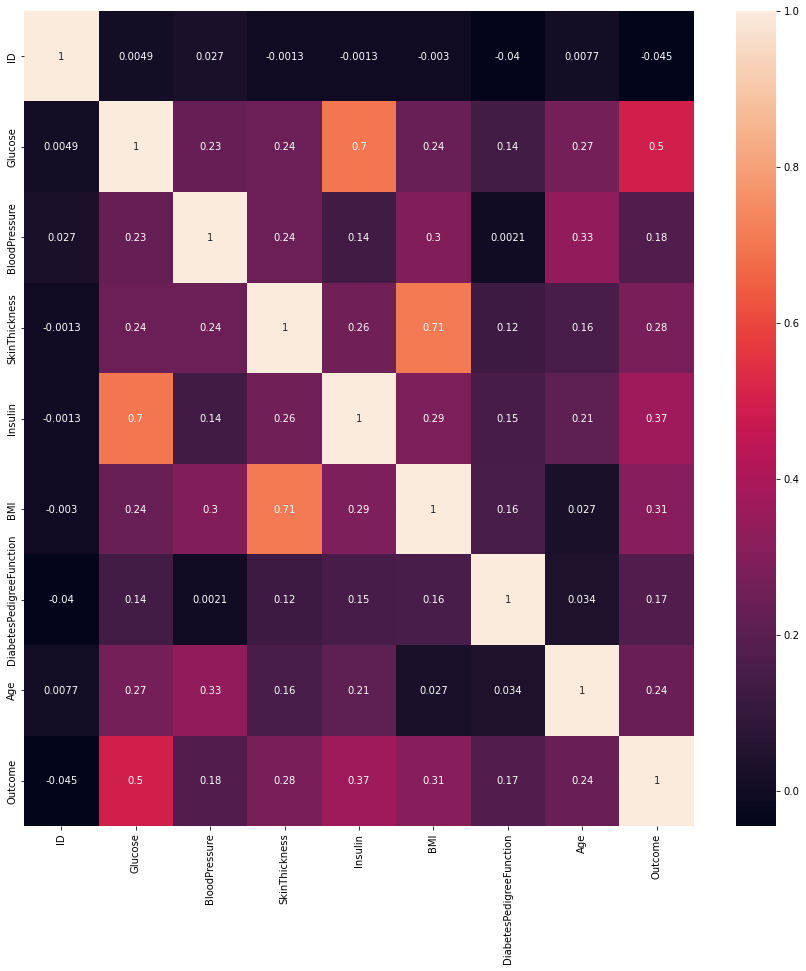

In [95]:
plt.figure(figsize=(15, 15))
sns.heatmap(dataset_corr, annot=True)
plt.show()

Hence, No Feature is needed to be dropped

# Dataset Balancing & Feature Scaling

In [96]:
# Drop ID from Dataset
dataset.drop('ID', axis=1,inplace=True)
dataset

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.000000,219.456643,33.6,0.627,50,1
1,85.0,66.0,29.000000,62.726687,26.6,0.351,31,0
2,183.0,64.0,20.980813,269.816743,23.3,0.672,32,1
3,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,122.0,70.0,27.000000,159.261753,36.8,0.340,27,0
765,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,126.0,60.0,28.311650,168.812206,30.1,0.349,47,1


In [97]:
# Defining x, y in Dataset
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , 7].values

In [98]:
# Applying SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))
balancer = SMOTE()
x, y = balancer.fit_resample(x, y)
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, counts of label '1': 268
Before OverSampling, counts of label '0': 500
After OverSampling, counts of label '1': 500
After OverSampling, counts of label '0': 500


In [99]:
sc = StandardScaler()
x = sc.fit_transform(x)

# Accuracy & Improvement Calculation

In [100]:
# Calculating Accuracies
acc_calculator('Accuracy2')

C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1968401990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classifiers[accr][i] = np.mean(cross_val_score(classifiers['Function'][i], x, y, cv=5,scoring='accuracy'))*100
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1968401990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classifiers[accr][i] = np.mean(cross_val_score(classifiers['Function'][i], x, y, cv=5,scoring='accuracy'))*100
C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/1968401990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [101]:
# Calculating Improvemts
for i in classifiers.index:
    classifiers["Improvement"][i] = classifiers["Accuracy2"][i] - classifiers["Accuracy1"][i]

C:\Users\Shubh\AppData\Local\Temp/ipykernel_12788/4036294550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classifiers["Improvement"][i] = classifiers["Accuracy2"][i] - classifiers["Accuracy1"][i]


In [102]:
# Calculated Accuracies
classifiers

,Model,Function,Accuracy1,Accuracy2,Improvement
0,KNN,KNeighborsClassifier(),72.397929,78.0,5.602071
1,SVM,SVC(),75.914608,80.1,4.185392
2,Decision Tree,DecisionTreeClassifier(),70.455819,77.5,7.044181
3,Random Forest,RandomForestClassifier(),76.829641,81.6,4.770359
